# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
145398               2020-07-11           2020-07-11            2020-07-07   
145399               2020-07-11           2020-07-11            2020-07-07   
145400               2020-07-11           2020-07-11            2020-07-01   
145401               2020-07-11           2020-07-11            2020-06-30   
145402               2020-07-11           2020-07-11            2020-07-04   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
145398             2020-06-21 00:00:00                   NaT   
145399             2020-07-04 00:00:00                   NaT   
145400             2020-07-01 00:00:00                   NaT   
145401             2020-06-16 00:00:00                   NaT   
145402             2020-06-25 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
145398                    NaT                 Cali  Valle del Cauca      Leve   
145399                    NaT                 Cali  Valle del Cauca      Leve   
145400                    NaT            Tauramena         Casanare      Leve   
145401                    NaT     Puerto leguízamo         Putumayo  Moderado   
145402                    NaT              Leticia         Amazonas      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
145398            Casa  ...               20 - 30    M               NaN   
145399            Casa  ...               30 - 40    F               NaN   
145400            Casa  ...               30 - 40    M               NaN   
145401        Hospital  ...               80 - 90    M               NaN   
145402            Casa  ...               40 - 50    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                      F        M
Departamento                                                        
Amazonas                                             1013.0   1398.0
Antioquia                                            3636.0   5108.0
Arauca                                                 18.0    123.0
Archipiélago de San Andrés Providencia y Santa ...      7.0     21.0
Atlántico                                            6683.0   7850.0
Barranquilla D.E.                                    8218.0   9884.0
Bogotá D.C.                                         23631.0  23893.0
Bolívar                                               574.0    733.0
Boyacá                                                240.0    244.0
Buenaventura D.E.                                     641.0   1064.0
Caldas                                                170.0    126.0
Caquetá                                                44.0     53.0
Cartagena D.T. y C.                                  4719.0   5887.0
Casanare                                               40.0     76.0
Cauca                                                 314.0    416.0
Cesar                                                 664.0    769.0
Chocó                                                 976.0   1200.0
Cundinamarca                                         2056.0   1996.0
Córdoba                                               752.0    774.0
Guainía                                                 6.0      8.0
Guaviare                                                5.0     37.0
Huila                                                 210.0    208.0
La Guajira                                            396.0    488.0
Magdalena                                             565.0    618.0
Meta                                                  282.0   1266.0
Nariño                                               2057.0   2400.0
Norte de Santander                                    248.0    304.0
Putumayo                                               36.0     52.0
Quindío                                               107.0     86.0
Risaralda                                             383.0    339.0
Santa Marta D.T. y C.                                 782.0    820.0
Santander                                             453.0    808.0
Sucre                                                1127.0   1292.0
Tolima                                                416.0   1019.0
Valle del Cauca                                      5725.0   6777.0
Vaupés                                                 10.0     19.0
Vichada                                                 0.0      1.0

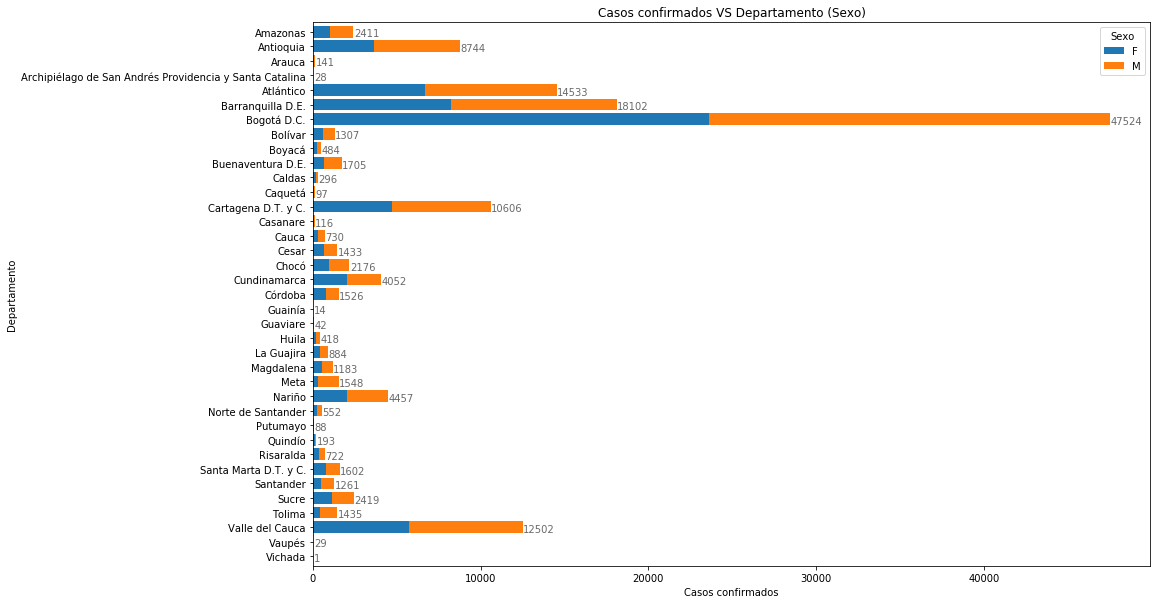

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               124      434      497   
Antioquia                                              321      744     2375   
Arauca                                                   2       33       59   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              608     1037     3214   
Barranquilla D.E.                                      610     1067     3956   
Bogotá D.C.                                           2374     3915    10911   
Bolívar                                                 62      123      293   
Boyacá                                                  29       44       95   
Buenaventura D.E.                                       34      243      386   
Caldas                                                  11       17       63   
Caquetá                                                  2        5       34   
Cartagena D.T. y C.                                    402      725     2455   
Casanare                                                 6        6       31   
Cauca                                                   39       63      153   
Cesar                                                  143      170      316   
Chocó                                                   92      190      522   
Cundinamarca                                           219      315      942   
Córdoba                                                 70       83      305   
Guainía                                                  0        2        4   
Guaviare                                                 0       16        9   
Huila                                                   24       39       72   
La Guajira                                              36       99      218   
Magdalena                                               69       93      207   
Meta                                                    18      112      518   
Nariño                                                 234      410     1049   
Norte de Santander                                      31       28      127   
Putumayo                                                 2        7       15   
Quindío                                                  8       12       29   
Risaralda                                               45       69      155   
Santa Marta D.T. y C.                                   69      108      329   
Santander                                               41      134      345   
Sucre                                                   87      183      545   
Tolima                                                  46       77      502   
Valle del Cauca                                        436      892     2849   
Vaupés                                                   0        3       11   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                463      325      260   
Antioquia                                              2258     1267      987   
Arauca                                                   35        7        3   
Archipiélago de San Andrés Providencia y Santa ...        9        6        3   
Atlántico                                              3444     2268     1913   
Barranquilla D.E.                                      4305     2806     2444   
Bogotá D.C.                                           10204     7502     6303   
Bolívar                                                 330      178      115   
Boyacá                                                   92       73 

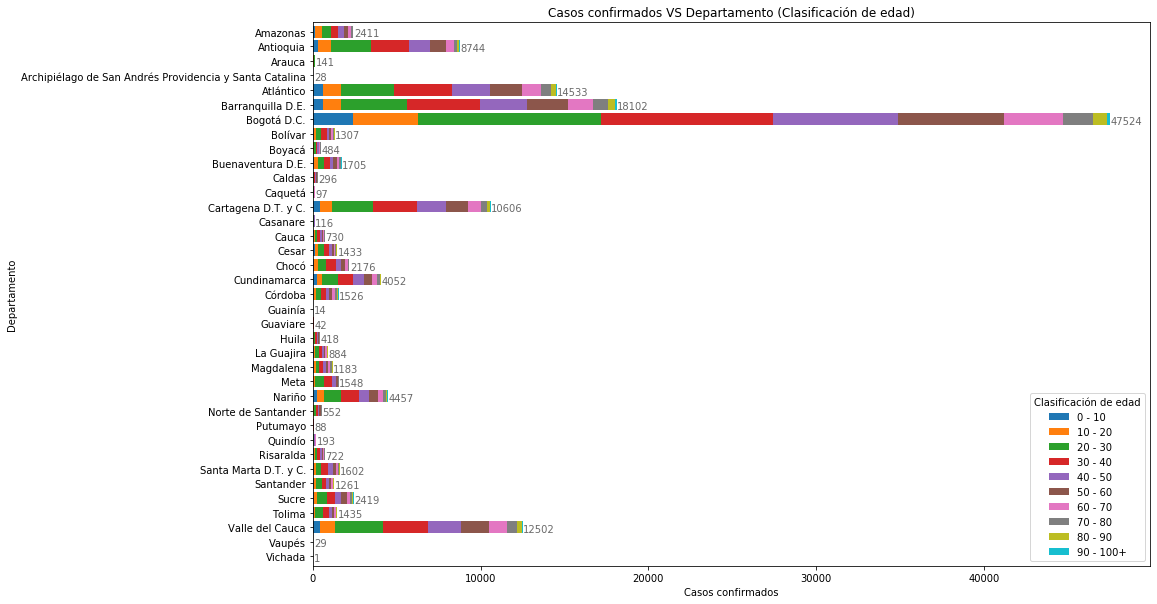

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              125.0      100.0   
Antioquia                                            5390.0       84.0   
Arauca                                                113.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            7209.0      714.0   
Barranquilla D.E.                                    8270.0     1085.0   
Bogotá D.C.                                         26347.0     1065.0   
Bolívar                                               597.0       57.0   
Boyacá                                                154.0       14.0   
Buenaventura D.E.                                     391.0      109.0   
Caldas                                                 60.0        7.0   
Caquetá                                                59.0        2.0   
Cartagena D.T. y C.                                  3895.0      383.0   
Casanare                                               56.0        1.0   
Cauca                                                 400.0       23.0   
Cesar                                                 511.0       34.0   
Chocó                                                 955.0       66.0   
Cundinamarca                                         1720.0       92.0   
Córdoba                                               724.0      162.0   
Guainía                                                 2.0        1.0   
Guaviare                                                9.0        0.0   
Huila                                                 102.0       13.0   
La Guajira                                            592.0       48.0   
Magdalena                                             463.0      127.0   
Meta                                                  433.0       17.0   
Nariño                                               1401.0      138.0   
Norte de Santander                                    274.0       25.0   
Putumayo                                               38.0        8.0   
Quindío                                                45.0        5.0   
Risaralda                                             306.0       20.0   
Santa Marta D.T. y C.                                 851.0       73.0   
Santander                                             788.0       24.0   
Sucre                                                1531.0      150.0   
Tolima                                                846.0       25.0   
Valle del Cauca                                      5514.0      446.0   
Vaupés                                                  7.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                10.0           7.0   
Antioquia                                              416.0          53.0   
Arauca                                                   1.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              590.0          95.0   
Barranquilla D.E.                                      818.0         117.0   
Bogotá D.C.                                           2569.0         147.0   
Bolívar                                                 74.0          10.0   
Boyacá                                                  33.0           2.0   
Buenaventura D.E.                                      110.0          20.0   
Caldas                                                  12.0           1.0   
Caquetá                                                 10.0           2.0   
Cartagena D.T. y C.  

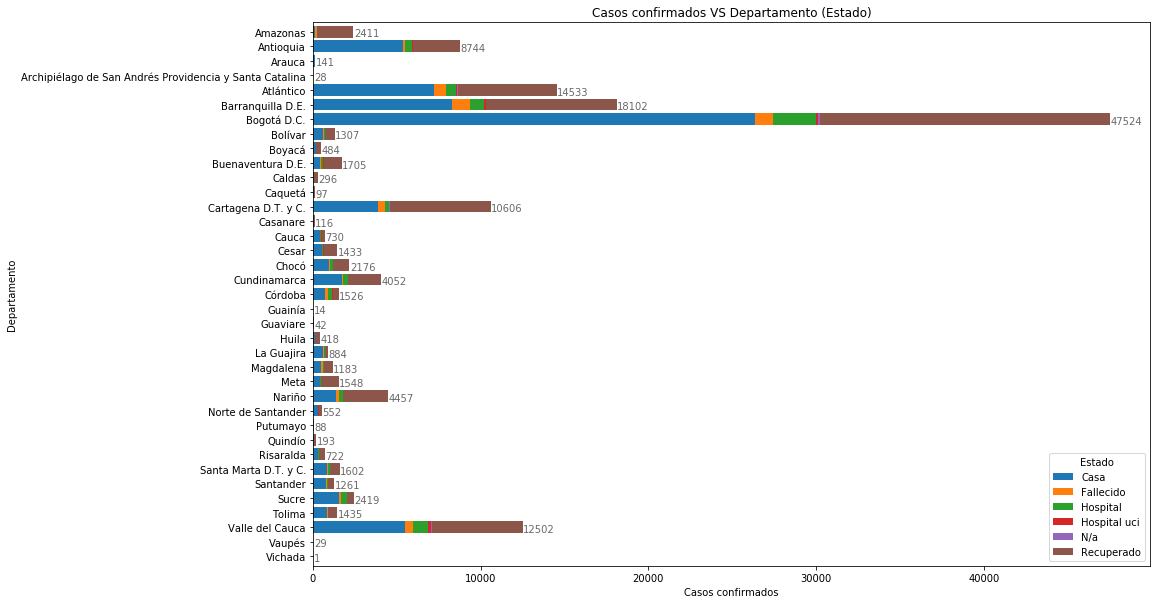

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          33115  37070
Fallecido      1937   3182
Hospital       3267   4360
Hospital uci    342    596
N/a             133    174
Recuperado    28411  32775

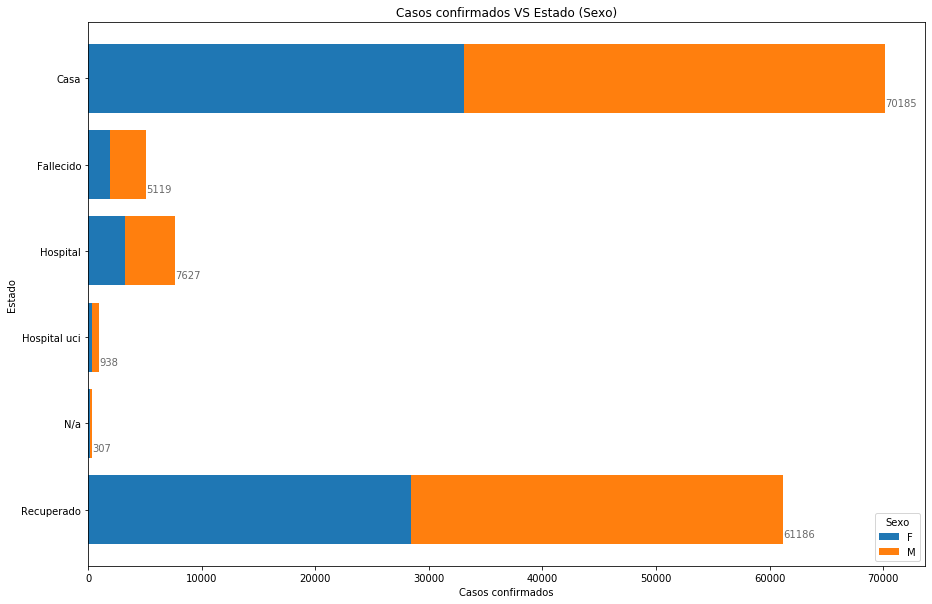

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     2960     5521    17938    17542    11018     8459   
Fallecido                  12       12       75      188      427      783   
Hospital                  272      181      643     1023     1191     1550   
Hospital uci               42       22       35      102      134      207   
N/a                         7        7       13       15       22       38   
Recuperado               3002     5757    14895    14201     9518     7357   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      4145     1749      728        125  
Fallecido                 1207     1269      922        224  
Hospital                  1346      905      446         70  
Hospital uci               208      138       45          5  
N/a                         68       67       54         16  
Recuperado                3868     1803      678        107

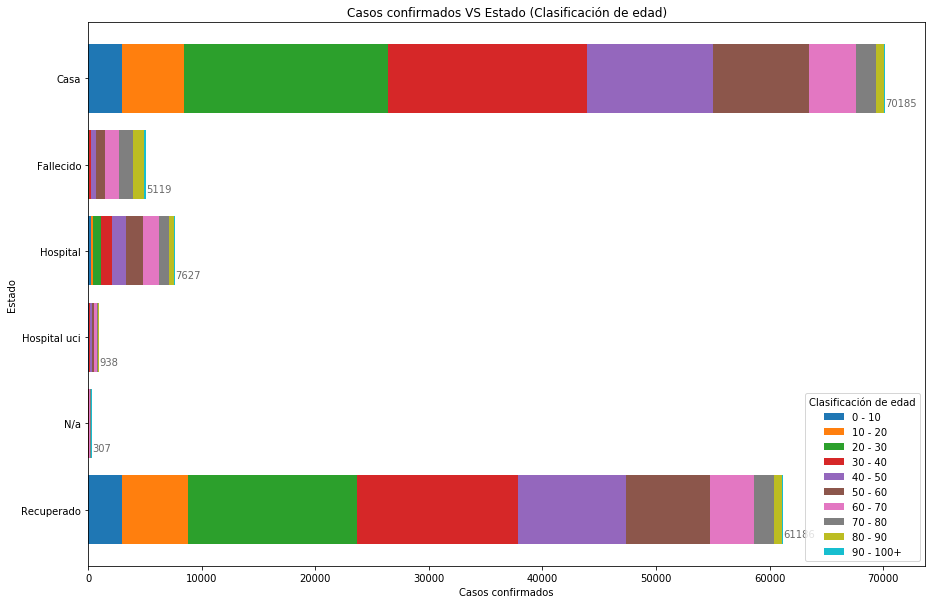

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   61516  67138
Importado      450    513
Relacionado   5239  10506

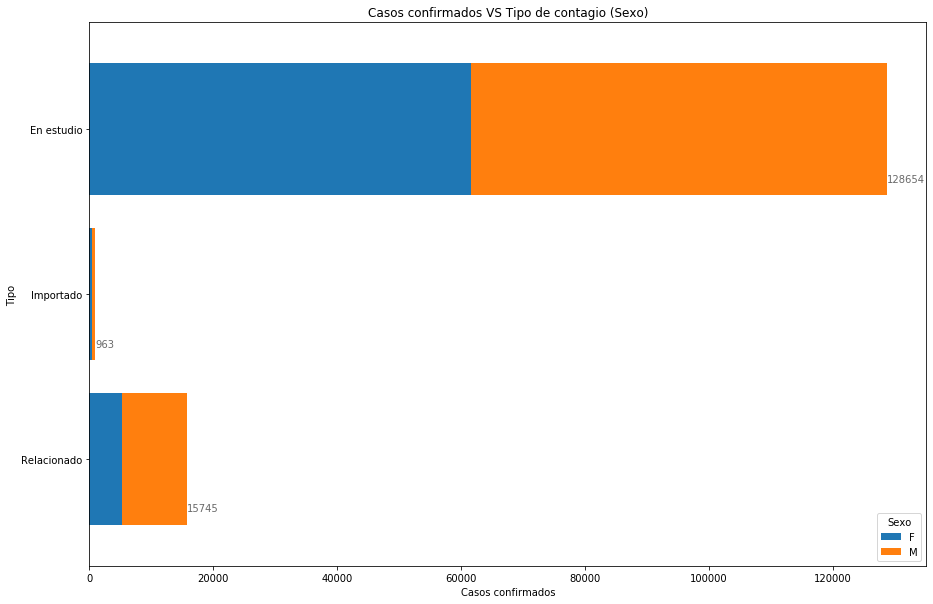

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               5487     9375    29014    29168    20124    16758   
Importado                   5       34      238      226      171      149   
Relacionado               803     2091     4347     3677     2015     1487   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio                9994     5541     2688        505  
Importado                   95       35        9          1  
Relacionado                753      355      176         41

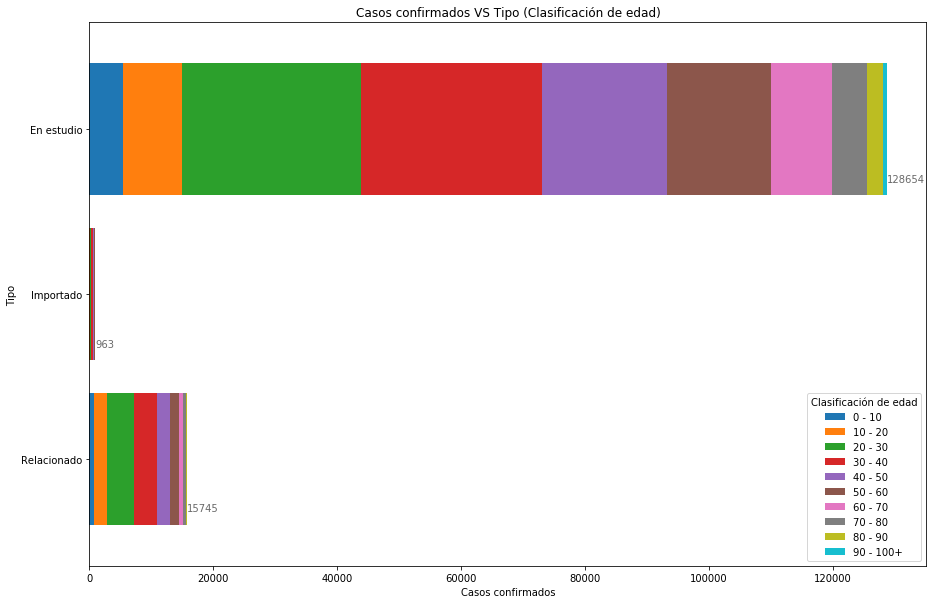

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  3191   3104
10 - 20                 5182   6318
20 - 30                15559  18040
30 - 40                15042  18029
40 - 50                10335  11975
50 - 60                 8483   9911
60 - 70                 4998   5844
70 - 80                 2685   3246
80 - 90                 1418   1455
90 - 100+                312    235

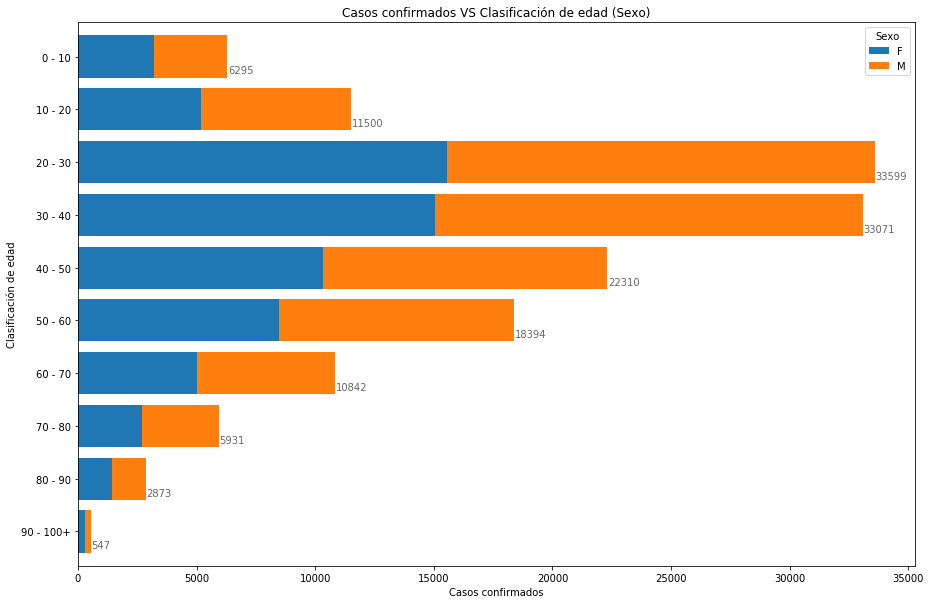

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  2960         12       272            42    7   
10 - 20                 5521         12       181            22    7   
20 - 30                17938         75       643            35   13   
30 - 40                17542        188      1023           102   15   
40 - 50                11018        427      1191           134   22   
50 - 60                 8459        783      1550           207   38   
60 - 70                 4145       1207      1346           208   68   
70 - 80                 1749       1269       905           138   67   
80 - 90                  728        922       446            45   54   
90 - 100+                125        224        70             5   16   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       3002  
10 - 20                      5757  
20 - 30                     14895  
30 - 40                     14201  
40 - 50                      9518  
50 - 60                      7357  
60 - 70                      3868  
70 - 80                      1803  
80 - 90                       678  
90 - 100+                     107

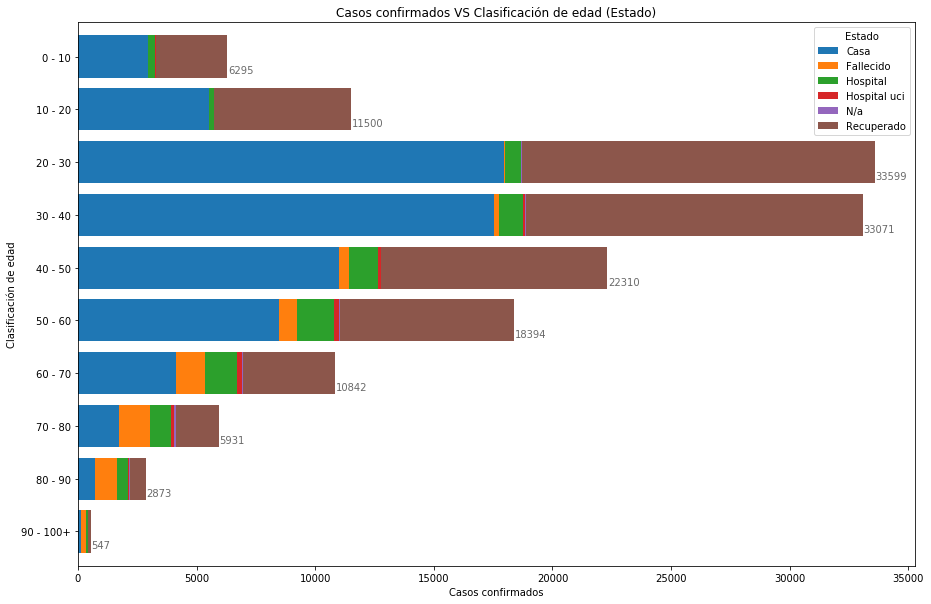

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-07            2018.0  2302.0
2020-07-08            1859.0  2048.0
2020-07-09            2324.0  2742.0
2020-07-10            2887.0  3471.0
2020-07-11            2210.0  2377.0

[125 rows x 2 columns]

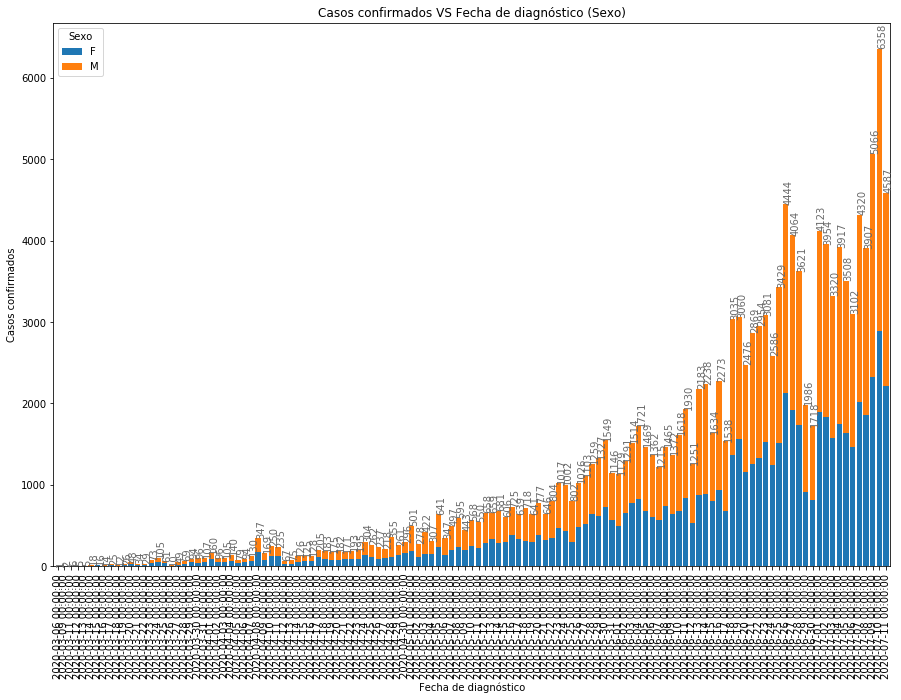

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-07                158      247     1030     1065      715      550   
2020-07-08                158      246      880      915      631      523   
2020-07-09                172      344     1190     1216      775      641   
2020-07-10                214      439     1544     1561      979      824   
2020-07-11                158      321     1071     1062      745      607   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-07                 284      163       98         10  
2020-07-08                 301      156       84         13  
2020-07-09                 391      206      108         23  
2020-07-10                 427      247      100         23  
2020-07-11                 353      171       89         10  

[125 rows x 10 columns]

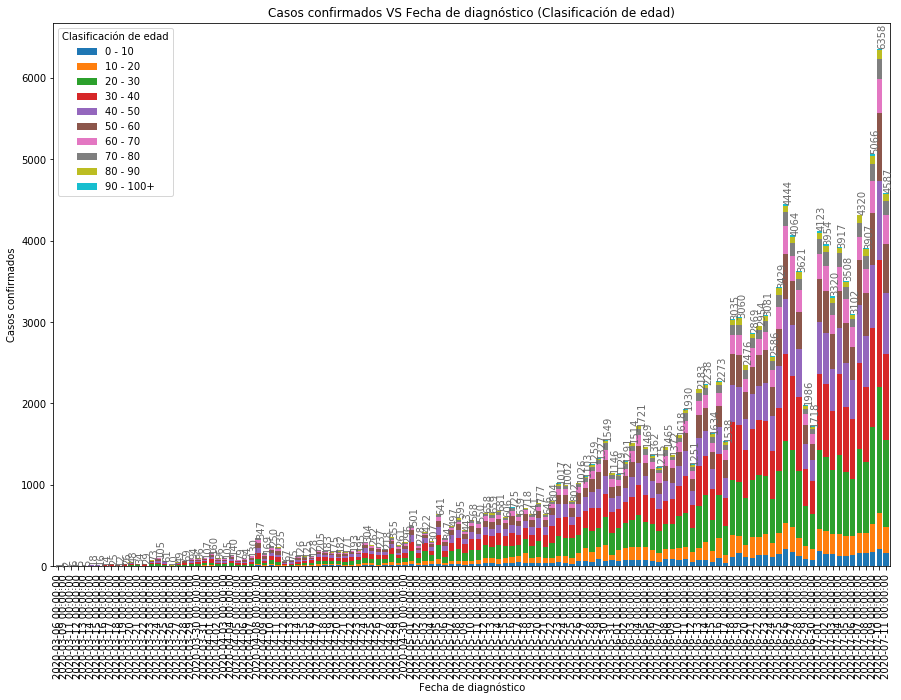

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                    
2020-03-06               0.0        0.0       0.0           0.0   0.0   
2020-03-09               0.0        0.0       0.0           0.0   0.0   
2020-03-11               0.0        0.0       0.0           0.0   0.0   
2020-03-12               0.0        0.0       0.0           0.0   0.0   
2020-03-13               0.0        0.0       0.0           0.0   0.0   
...                      ...        ...       ...           ...   ...   
2020-07-07            3790.0      102.0     343.0          25.0  10.0   
2020-07-08            3468.0      103.0     299.0          26.0   5.0   
2020-07-09            4463.0      135.0     428.0          30.0   1.0   
2020-07-10            5924.0       71.0     333.0          22.0   3.0   
2020-07-11            4170.0        9.0     374.0          34.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-07                  50.0  
2020-07-08                   6.0  
2020-07-09                   9.0  
2020-07-10                   5.0  
2020-07-11                   0.0  

[125 rows x 6 columns]

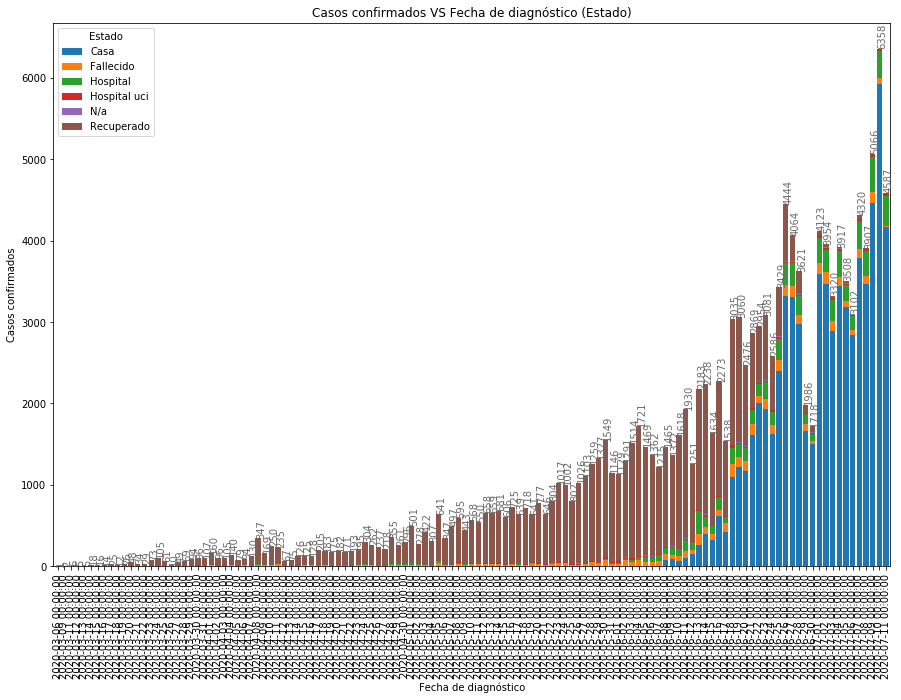

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F        M
Fecha de diagnóstico                  
2020-03-06                1.0      0.0
2020-03-09                2.0      1.0
2020-03-11                6.0      3.0
2020-03-12               11.0      3.0
2020-03-13               13.0      6.0
...                       ...      ...
2020-07-07            56417.0  65755.0
2020-07-08            58276.0  67803.0
2020-07-09            60600.0  70545.0
2020-07-10            63487.0  74016.0
2020-07-11            65697.0  76393.0

[125 rows x 2 columns]

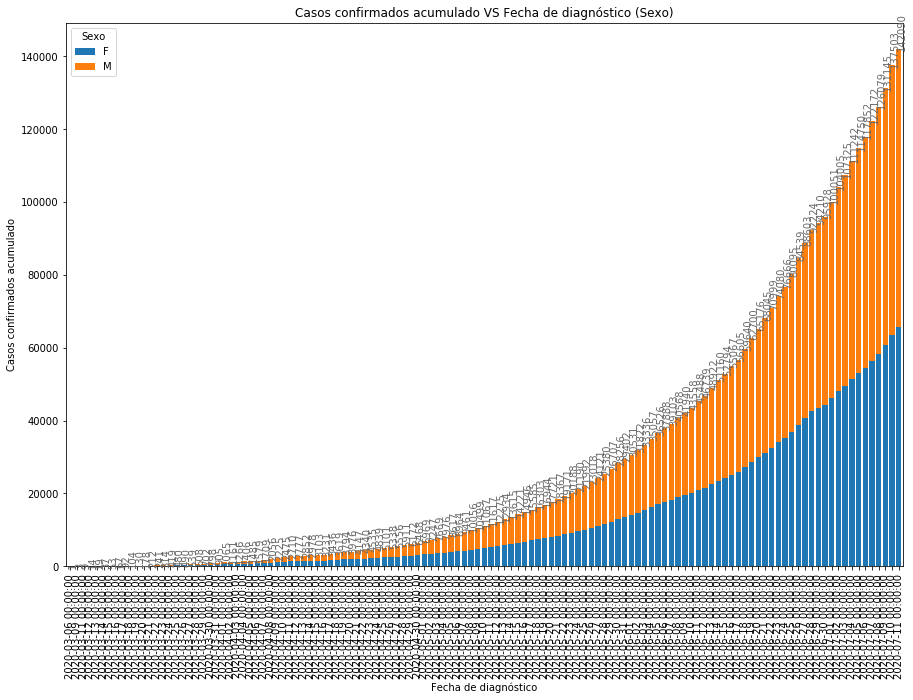

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-07               5470     9911    28146    27520    18704    15403   
2020-07-08               5628    10157    29026    28435    19335    15926   
2020-07-09               5800    10501    30216    29651    20110    16567   
2020-07-10               6014    10940    31760    31212    21089    17391   
2020-07-11               6172    11261    32831    32274    21834    17998   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-07                9120     5009     2420        469  
2020-07-08                9421     5165     2504        482  
2020-07-09                9812     5371     2612        505  
2020-07-10               10239     5618     2712        528  
2020-07-11               10592     5789     2801        538  

[125 rows x 10 columns]

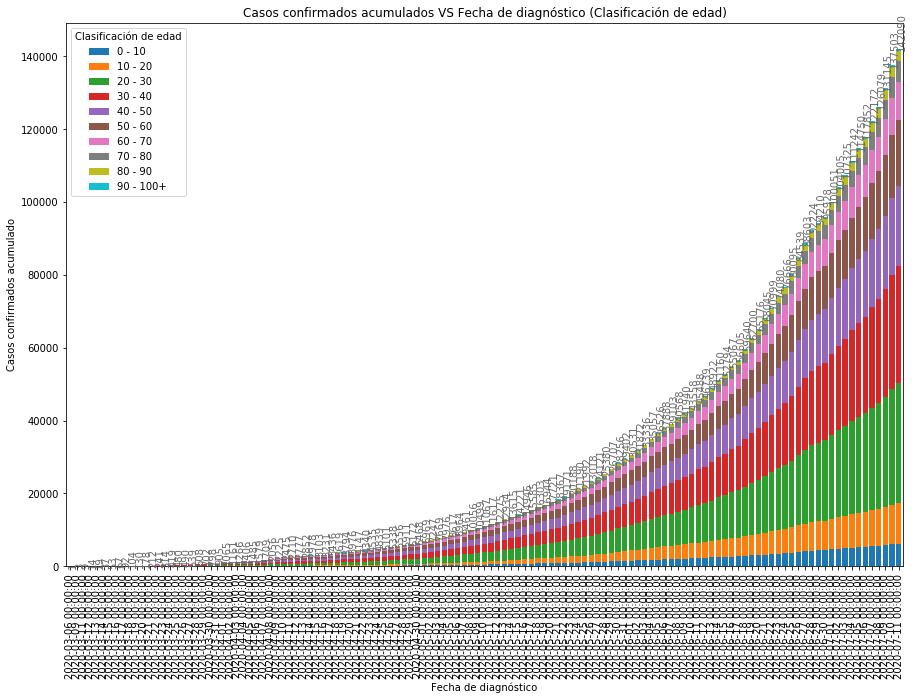

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-07            51550.0     4661.0    6067.0         794.0  285.0   
2020-07-08            55018.0     4764.0    6366.0         820.0  290.0   
2020-07-09            59481.0     4899.0    6794.0         850.0  291.0   
2020-07-10            65405.0     4970.0    7127.0         872.0  294.0   
2020-07-11            69575.0     4979.0    7501.0         906.0  294.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-07               58815.0  
2020-07-08               58821.0  
2020-07-09               58830.0  
2020-07-10               58835.0  
2020-07-11               58835.0  

[125 rows x 6 columns]

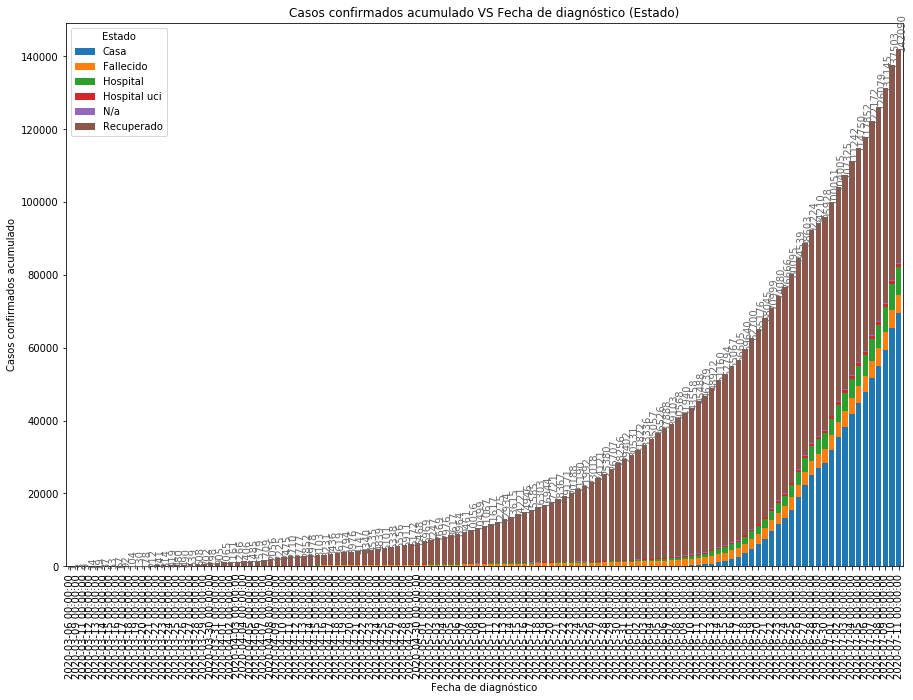

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>